In [1]:
#exercise 4.1
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
#데이터 저장 위치
name_series = pd.Series(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
hpower_series = pd.Series([130.0, 250.0, 190.0, 300.0, 210.0, 220.0, 170.0])
feff_series = pd.Series([16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2])
df = pd.DataFrame({'name' : name_series, 'hpower': hpower_series, 'feff' : feff_series})
print(df)

  name  hpower  feff
0    A   130.0  16.3
1    B   250.0  10.2
2    C   190.0  11.1
3    D   300.0   7.1
4    E   210.0  12.1
5    F   220.0  13.2
6    G   170.0  14.2


<AxesSubplot:xlabel='hpower', ylabel='feff'>

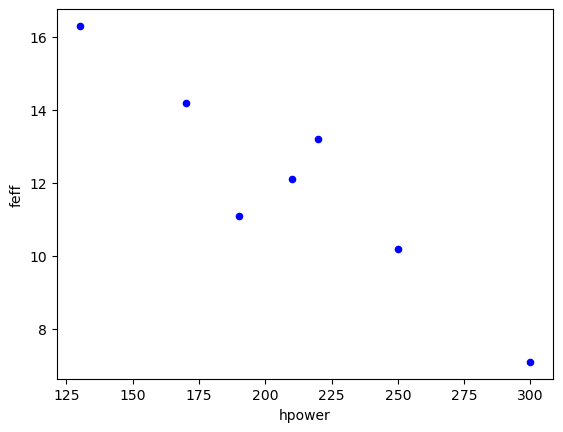

In [2]:
df.plot(kind = 'scatter', x= 'hpower', y= 'feff', color = 'b')

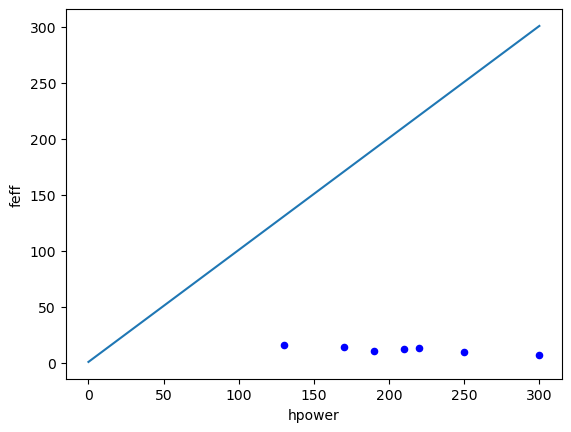

In [3]:
w, b = 1, 1
x0, x1 = 0, 300
def h (x, w, b): #가설에 따라 값을 계산하는 함수 y=wx+b
    return w*x + b

df.plot(kind = 'scatter', x= 'hpower', y= 'feff', color = 'b')
plt.plot([x0, x1], [h(x0, w, b), h(x1, w, b)])

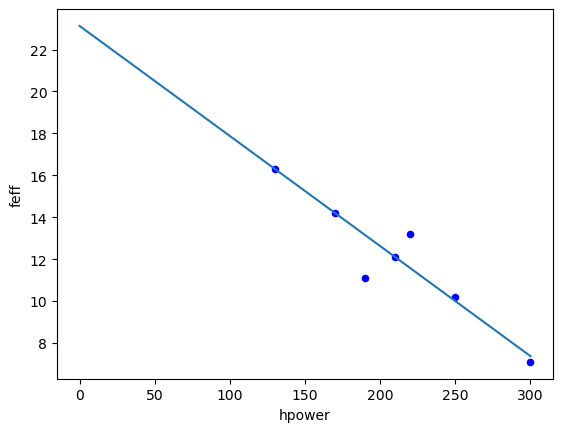

In [4]:
#df 스캐터를 보고 대충 눈으로 A데이터, G데이터의 기울기를 맞춰 그려본 그래프
w, b = -0.0525, 23.125
x0, x1 = 0.0, 300

df.plot(kind = 'scatter', x= 'hpower', y= 'feff', color = 'b')
plt.plot([x0,x1], [h(x0, w, b), h(x1, w, b)],)

In [5]:
import numpy as np
df_to_np = df.to_numpy()
x = df_to_np[:, 1]
y = df_to_np[:, 2]
print(df_to_np)
print(x)
print(y)

[['A' 130.0 16.3]
 ['B' 250.0 10.2]
 ['C' 190.0 11.1]
 ['D' 300.0 7.1]
 ['E' 210.0 12.1]
 ['F' 220.0 13.2]
 ['G' 170.0 14.2]]
[130.0 250.0 190.0 300.0 210.0 220.0 170.0]
[16.3 10.2 11.1 7.1 12.1 13.2 14.2]


w = 1.00, 평균제곱오차(mse) : 42061.66
w = 0.99, 평균제곱오차(mse) : 41180.24
w = 0.98, 평균제곱오차(mse) : 40308.15
w = 0.97, 평균제곱오차(mse) : 39445.41
w = 0.96, 평균제곱오차(mse) : 38592.01
w = 0.95, 평균제곱오차(mse) : 37747.94
w = 0.94, 평균제곱오차(mse) : 36913.22
w = 0.93, 평균제곱오차(mse) : 36087.83
w = 0.92, 평균제곱오차(mse) : 35271.79
w = 0.91, 평균제곱오차(mse) : 34465.08
w = 0.90, 평균제곱오차(mse) : 33667.72
w = 0.89, 평균제곱오차(mse) : 32879.70
w = 0.88, 평균제곱오차(mse) : 32101.01
w = 0.87, 평균제곱오차(mse) : 31331.67
w = 0.86, 평균제곱오차(mse) : 30571.66
w = 0.85, 평균제곱오차(mse) : 29821.00
w = 0.84, 평균제곱오차(mse) : 29079.67
w = 0.83, 평균제곱오차(mse) : 28347.69
w = 0.82, 평균제곱오차(mse) : 27625.05
w = 0.81, 평균제곱오차(mse) : 26911.74
w = 0.80, 평균제곱오차(mse) : 26207.78
w = 0.79, 평균제곱오차(mse) : 25513.15
w = 0.78, 평균제곱오차(mse) : 24827.87
w = 0.77, 평균제곱오차(mse) : 24151.92
w = 0.76, 평균제곱오차(mse) : 23485.32
w = 0.75, 평균제곱오차(mse) : 22828.06
w = 0.74, 평균제곱오차(mse) : 22180.13
w = 0.73, 평균제곱오차(mse) : 21541.55
w = 0.72, 평균제곱오차(mse) : 20912.30
w = 0.71, 평균제곱오차(mse) : 20292.40
w = 0.70, 

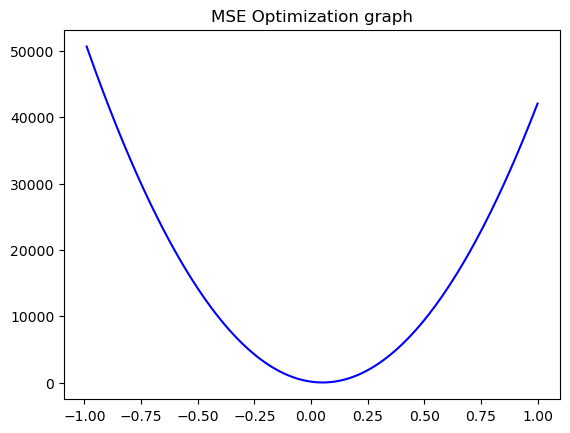

In [6]:
#y절편 0으로 고정, w값 찾아가기 연습 (mse 기반)
#https://matplotlib.org/stable/tutorials/introductory/quick_start.html
%matplotlib inline 
import numpy as np
from sklearn.metrics import mean_squared_error as mse

mse_list = []
w_list = np.arange(1.0, -1.0, -0.01)
min_mse = float('inf') #최소 mse값
best_w = None #최소 mse값의 w값

for w in list(w_list):
    y_hat = w * x
    print('w = {:.2f}, 평균제곱오차(mse) : {:.2f}'.format(w, mse(y_hat, y)))
    current_mse = mse(y_hat, y)
    mse_list.append(mse(y_hat, y)) # 포물선 그리기
    if current_mse < min_mse:
        min_mse = current_mse
        best_w = w

print('가장 작은 평균 제곱 오차 : {:.2f}, 그 때의 w 값 : {:.2f}'.format(min_mse, best_w))
plt.title('MSE Optimization graph')
plt.plot(w_list, mse_list, c = 'blue')

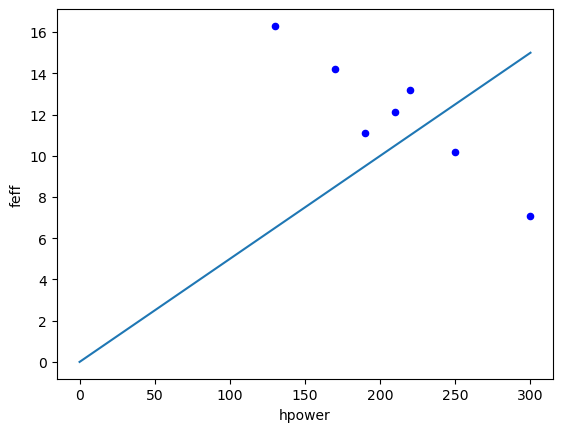

In [7]:
w, b = 0.05, 0
x0, x1 = 0.0, 300

df.plot(kind = 'scatter', x= 'hpower', y= 'feff', color = 'b')
plt.plot([x0,x1], [h(x0, w, b), h(x1, w, b)])

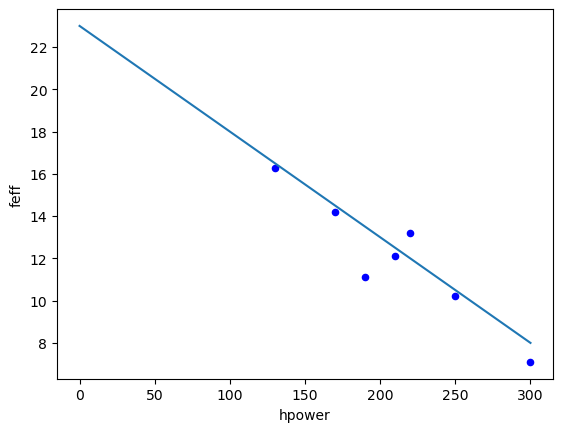

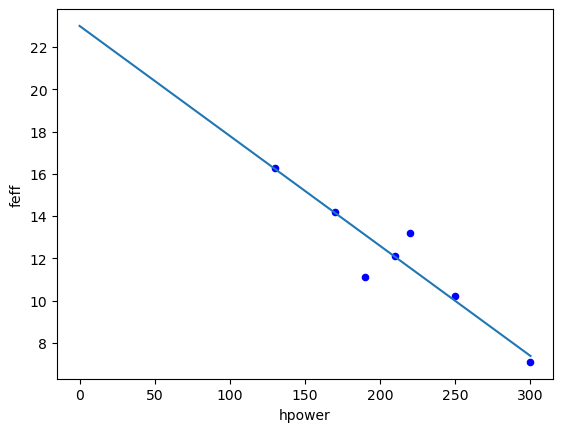

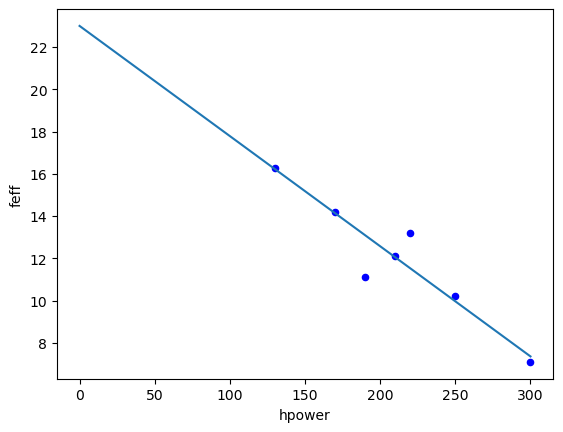

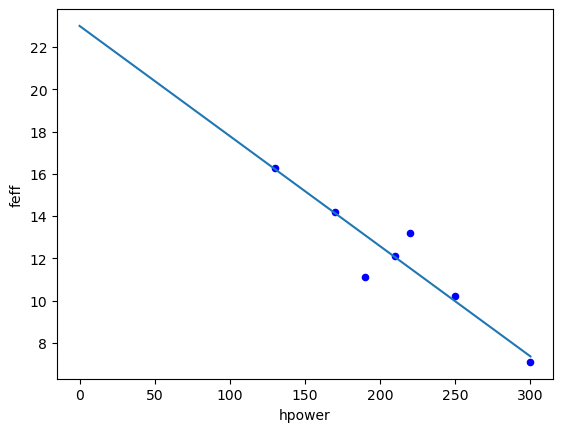

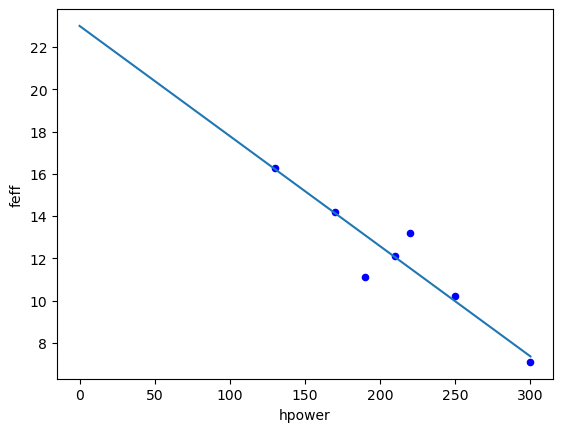

In [8]:
def h(x, param):
    return param[0]*x + param[1]

learning_iteration = 500 #하이퍼파라미터 : 학습반복 횟수
learning_rate = 0.0000001 #하이퍼파라미터 : 학습율

param = [-0.05, 23] #w, b를 하나의 변수로

for i in range(learning_iteration):
    if i % 100 == 0:
        df.plot(kind = 'scatter', x= 'hpower', y= 'feff', color = 'b')
        plt.plot([0, 300], [h(0, param), h(300, param)])
    error = (h(x, param) - y)
    param[0] -= learning_rate * (error * x).sum()
    param[1] -= learning_rate * error.sum()

In [9]:
import matplotlib.pyplot as plt
from sklearn import linear_model

x_naxis = x[:, np.newaxis]
print(x_naxis)

[[130.0]
 [250.0]
 [190.0]
 [300.0]
 [210.0]
 [220.0]
 [170.0]]


In [10]:
regr = linear_model.LinearRegression()
regr.fit(x_naxis, y)

LinearRegression()

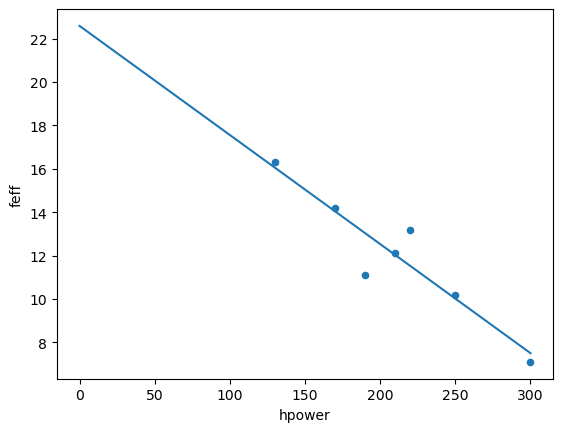

In [11]:
df.plot(kind = 'scatter', x = 'hpower', y = 'feff')
y_pred = regr.predict([[0], [300]])
plt.plot([0,300], y_pred)

In [12]:
X = np.c_[np.ones((7, 1)), x_naxis]
print(X)

[[1.0 130.0]
 [1.0 250.0]
 [1.0 190.0]
 [1.0 300.0]
 [1.0 210.0]
 [1.0 220.0]
 [1.0 170.0]]


In [13]:
print(X.dtype)  # X의 데이터 유형 확인
X = X.astype(float)  # X를 float으로 변환
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

object


array([22.586263736263682, -0.05027472527472507], dtype=object)

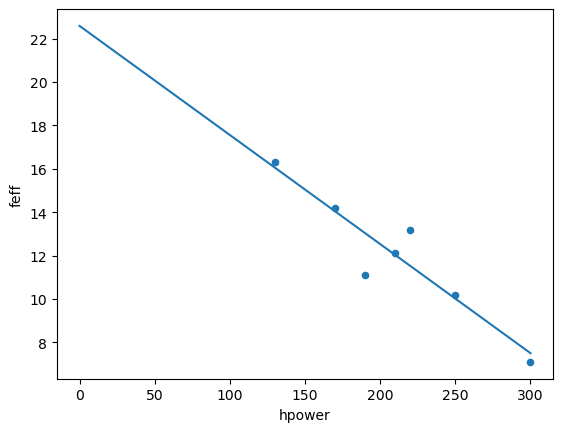

In [14]:
def h(x, theta):
    return x*theta[1] + theta[0]

df.plot(kind = 'scatter', x = 'hpower', y = 'feff') #데이터
plt.plot([0, 300], [h(0, theta), h(300, theta)]) #가설

In [15]:
!pip install seaborn

In [16]:
import seaborn as sns
df

,name,hpower,feff
0,A,130.0,16.3
1,B,250.0,10.2
2,C,190.0,11.1
3,D,300.0,7.1
4,E,210.0,12.1
5,F,220.0,13.2
6,G,170.0,14.2


In [17]:
#데이터에 결손값 추가해보기
df.loc[len(df)] = ['H', None, 15]
df

,name,hpower,feff
0,A,130.0,16.3
1,B,250.0,10.2
2,C,190.0,11.1
3,D,300.0,7.1
4,E,210.0,12.1
5,F,220.0,13.2
6,G,170.0,14.2
7,H,NaN,15.0


In [18]:
print(df.shape)
print(df.isnull().sum())

(8, 3)
name      0
hpower    1
feff      0
dtype: int64


In [19]:
df.dropna(inplace = True)
print(df.shape)
print(df.isnull().sum())
df

(7, 3)
name      0
hpower    0
feff      0
dtype: int64


,name,hpower,feff
0,A,130.0,16.3
1,B,250.0,10.2
2,C,190.0,11.1
3,D,300.0,7.1
4,E,210.0,12.1
5,F,220.0,13.2
6,G,170.0,14.2


In [20]:
#4.1.1 문제
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
name_series = pd.Series(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
hpower_series = pd.Series([130.0, 250.0, 190.0, 300.0, 210.0, 220.0, 170.0])
feff_series = pd.Series([16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2])
df = pd.DataFrame({'name' : name_series, 'hpower': hpower_series, 'feff' : feff_series})
print(df)

  name  hpower  feff
0    A   130.0  16.3
1    B   250.0  10.2
2    C   190.0  11.1
3    D   300.0   7.1
4    E   210.0  12.1
5    F   220.0  13.2
6    G   170.0  14.2


In [21]:
#y절편 0으로 고정, w값 찾아가기 연습 (mse 기반)
#https://matplotlib.org/stable/tutorials/introductory/quick_start.html
%matplotlib inline 
import numpy as np
from sklearn.metrics import mean_squared_error as mse

w_list = np.arange(1.0, -1.0, -0.05)
b_list = np.arange(0.0, 25.0, 1.0)
min_mse = float('inf') #최소 mse값
best_w = None #최소 mse값의 w값
b = None #최소 mse값의 b값

for w in list(w_list):
    for b in list(b_list):
        y_hat = w*x + b
        print('w = {:.2f}, b = {:.1f} 평균제곱오차(mse) : {:.2f}'.format(w, b, mse(y_hat, y)))
        current_mse = mse(y_hat, y)
        if current_mse < min_mse:
            min_mse = current_mse
            best_w = w
            best_b = b
    print('===============================================')
print('가장 작은 평균 제곱 오차 : {:.2f}, 그 때의 w 값 : {:.2f}, 그 때의 b 값 : {:.1f}'.format(min_mse, best_w, best_b))

w = 1.00, b = 0.0 평균제곱오차(mse) : 42061.66
w = 1.00, b = 1.0 평균제곱오차(mse) : 42458.61
w = 1.00, b = 2.0 평균제곱오차(mse) : 42857.55
w = 1.00, b = 3.0 평균제곱오차(mse) : 43258.49
w = 1.00, b = 4.0 평균제곱오차(mse) : 43661.43
w = 1.00, b = 5.0 평균제곱오차(mse) : 44066.38
w = 1.00, b = 6.0 평균제곱오차(mse) : 44473.32
w = 1.00, b = 7.0 평균제곱오차(mse) : 44882.26
w = 1.00, b = 8.0 평균제곱오차(mse) : 45293.21
w = 1.00, b = 9.0 평균제곱오차(mse) : 45706.15
w = 1.00, b = 10.0 평균제곱오차(mse) : 46121.09
w = 1.00, b = 11.0 평균제곱오차(mse) : 46538.03
w = 1.00, b = 12.0 평균제곱오차(mse) : 46956.98
w = 1.00, b = 13.0 평균제곱오차(mse) : 47377.92
w = 1.00, b = 14.0 평균제곱오차(mse) : 47800.86
w = 1.00, b = 15.0 평균제곱오차(mse) : 48225.81
w = 1.00, b = 16.0 평균제곱오차(mse) : 48652.75
w = 1.00, b = 17.0 평균제곱오차(mse) : 49081.69
w = 1.00, b = 18.0 평균제곱오차(mse) : 49512.63
w = 1.00, b = 19.0 평균제곱오차(mse) : 49945.58
w = 1.00, b = 20.0 평균제곱오차(mse) : 50380.52
w = 1.00, b = 21.0 평균제곱오차(mse) : 50817.46
w = 1.00, b = 22.0 평균제곱오차(mse) : 51256.41
w = 1.00, b = 23.0 평균제곱오차(mse) : 51697.35
w 

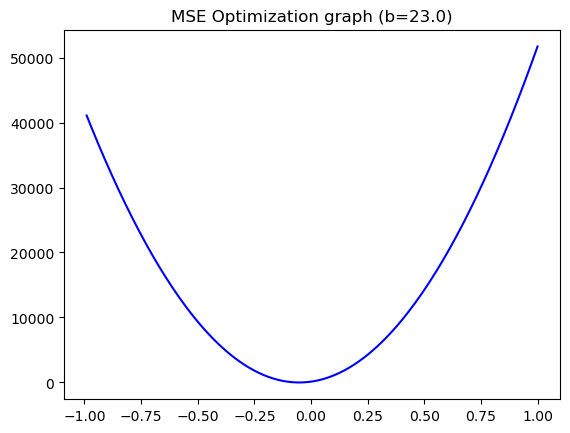

In [22]:
mse_list = []
w_list = np.arange(1.0, -1.0, -0.01)

for w in list(w_list):
    y_hat = w*x + best_b
    mse_list.append(mse(y_hat, y)) # 포물선 그리기

plt.title('MSE Optimization graph (b=23.0)')
plt.plot(w_list, mse_list, c = 'blue')

In [23]:
#4.1.1 문제
print('계수 : [{:f}]'.format(best_w))
print('절편 : {:f}'.format(best_b))
X = df[['hpower']]
y = df['feff']
lin_model = LinearRegression()
lin_model.fit(X, y)
print('예측 점수 : ', lin_model.score(X, y))

계수 : [-0.050000]
절편 : 23.000000
예측 점수 :  0.8706727649378525


In [24]:
#4.1.2 문제
expt_feff = best_w * 270 + best_b
expt_feff
print('270 마력 자동차의 예상 연비 :', expt_feff, 'km/l')

270 마력 자동차의 예상 연비 : 9.499999999999748 km/l


In [25]:
#Exercise 4.2
import pandas as pd
weight_series = pd.Series([1900, 2600, 2200, 2900, 2400, 2300, 2100])
df['weight'] = weight_series
df = df[['name', 'hpower', 'feff', 'weight']]
X = df[['hpower', 'weight']]
y = df['feff']
print(X, '\n')
print(y)

   hpower  weight
0   130.0    1900
1   250.0    2600
2   190.0    2200
3   300.0    2900
4   210.0    2400
5   220.0    2300
6   170.0    2100 

0    16.3
1    10.2
2    11.1
3     7.1
4    12.1
5    13.2
6    14.2
Name: feff, dtype: float64


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
from sklearn.linear_model import LinearRegression
linear_df = LinearRegression()
linear_df.fit(X_train, y_train)
print(X_train, '\n')
print(y_train)

   hpower  weight
2   190.0    2200
1   250.0    2600
0   130.0    1900
4   210.0    2400
3   300.0    2900 

2    11.1
1    10.2
0    16.3
4    12.1
3     7.1
Name: feff, dtype: float64


In [28]:
import numpy as np
df_to_np = df.to_numpy()
x1 = df_to_np[:, 1]
x2 = df_to_np[:, 3]
y = df_to_np[:, 2]
print(df_to_np)
print(x1)
print(x2)
print(y)

[['A' 130.0 16.3 1900]
 ['B' 250.0 10.2 2600]
 ['C' 190.0 11.1 2200]
 ['D' 300.0 7.1 2900]
 ['E' 210.0 12.1 2400]
 ['F' 220.0 13.2 2300]
 ['G' 170.0 14.2 2100]]
[130.0 250.0 190.0 300.0 210.0 220.0 170.0]
[1900 2600 2200 2900 2400 2300 2100]
[16.3 10.2 11.1 7.1 12.1 13.2 14.2]


In [29]:
#https://matplotlib.org/stable/tutorials/introductory/quick_start.html
%matplotlib inline 
import numpy as np
from sklearn.metrics import mean_squared_error as mse

w1_list = np.arange(0.01, -0.01, -0.0005)
w2_list = np.arange(0.01, -0.01, -0.0005)
b_list = np.arange(29, 31, 0.5)
min_mse = float('inf') #최소 mse값
best_w1 = None #최소 mse값의 w값
best_w2 = None #최소 mse값의 w값
b = None #최소 mse값의 b값

for w1 in list(w1_list):
    for w2 in list(w2_list):
        for b in list(b_list):
            y_hat = w1*x1 + w2*x2 + b
            print('w1 = {:.4f}, w2 = {:.4f}, b = {:.3f} 평균제곱오차(mse) : {:.3f}'.format(w1, w2, b, mse(y_hat, y)))
            current_mse = mse(y_hat, y)
            if current_mse < min_mse:
                min_mse = current_mse
                best_w1 = w1
                best_w2 = w2
                best_b = b
    print('===============================================')
print('가장 작은 평균 제곱 오차 : {:.4f}, 그 때의 w1 값 : {:.4f}, 그 때의 w2 값 : {:.3f}, 그 때의 b 값 : {:.1f}'.format(min_mse, best_w1, best_w2, best_b))

w1 = 0.0100, w2 = 0.0100, b = 29.000 평균제곱오차(mse) : 1844.999
w1 = 0.0100, w2 = 0.0100, b = 29.500 평균제곱오차(mse) : 1887.749
w1 = 0.0100, w2 = 0.0100, b = 30.000 평균제곱오차(mse) : 1930.999
w1 = 0.0100, w2 = 0.0100, b = 30.500 평균제곱오차(mse) : 1974.749
w1 = 0.0100, w2 = 0.0095, b = 29.000 평균제곱오차(mse) : 1744.937
w1 = 0.0100, w2 = 0.0095, b = 29.500 평균제곱오차(mse) : 1786.516
w1 = 0.0100, w2 = 0.0095, b = 30.000 평균제곱오차(mse) : 1828.594
w1 = 0.0100, w2 = 0.0095, b = 30.500 평균제곱오차(mse) : 1871.173
w1 = 0.0100, w2 = 0.0090, b = 29.000 평균제곱오차(mse) : 1647.667
w1 = 0.0100, w2 = 0.0090, b = 29.500 평균제곱오차(mse) : 1688.074
w1 = 0.0100, w2 = 0.0090, b = 30.000 평균제곱오차(mse) : 1728.981
w1 = 0.0100, w2 = 0.0090, b = 30.500 평균제곱오차(mse) : 1770.389
w1 = 0.0100, w2 = 0.0085, b = 29.000 평균제곱오차(mse) : 1553.189
w1 = 0.0100, w2 = 0.0085, b = 29.500 평균제곱오차(mse) : 1592.424
w1 = 0.0100, w2 = 0.0085, b = 30.000 평균제곱오차(mse) : 1632.160
w1 = 0.0100, w2 = 0.0085, b = 30.500 평균제곱오차(mse) : 1672.396
w1 = 0.0100, w2 = 0.0080, b = 29.000 평균제

In [30]:
#4.2.1 문제
print('계수 : [{:f}, {:f}]'.format(best_w2, best_w1))
print('절편 : {:f}'.format(best_b))
lin_model.fit(X, y)
print('예측 점수 : ', lin_model.score(X, y))

계수 : [-0.007000, -0.007500]
절편 : 30.000000
예측 점수 :  0.8871254041192395


In [31]:
#4.2.2 문제
expt_feff = best_w1 * 270 + best_w2 * 2500 + best_b
expt_feff
print('270 마력 자동차의 예상 연비 :', expt_feff, 'km/l')

270 마력 자동차의 예상 연비 : 10.474999999999959 km/l


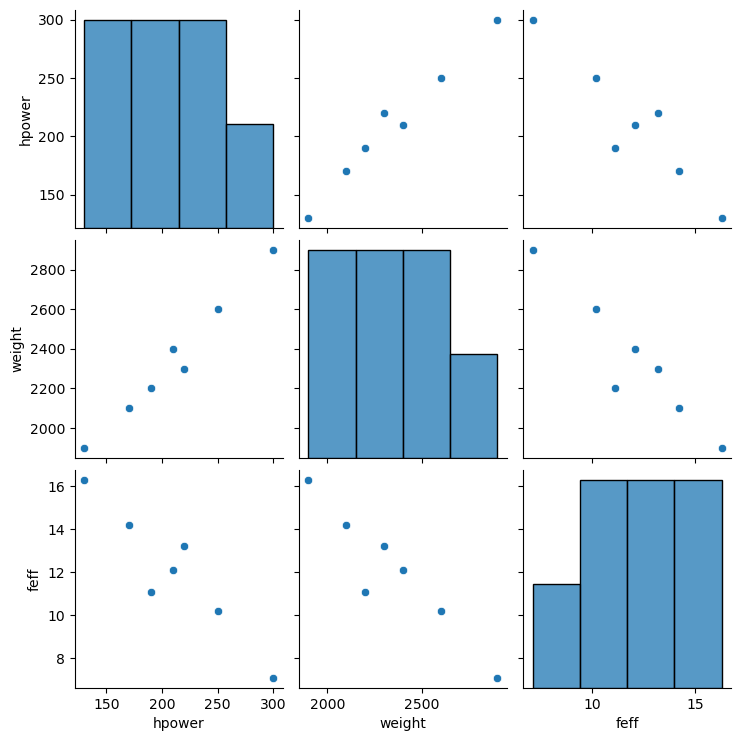

In [32]:
#4.2.3 문제
sns.pairplot(df[['hpower', 'weight', 'feff']])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

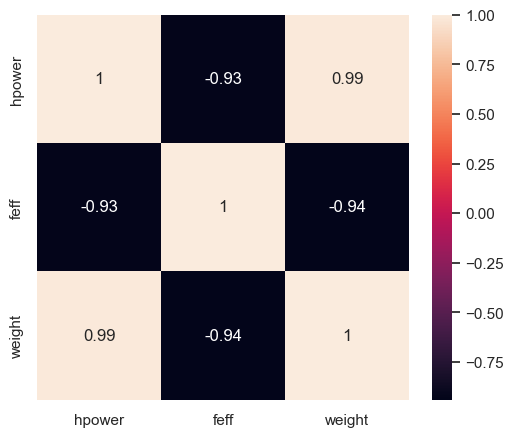

In [33]:
#4.2.4 문제
sns.set(rc={'figure.figsize':(6,5)}) #상관행렬 가시
correlation_matrix = df.corr().round(2) #상관행렬 생성
sns.heatmap(data=correlation_matrix, annot=True)
plt.show
#4.2.5 문제 -> feff, weight 반비례 / hpower, feff 비례 

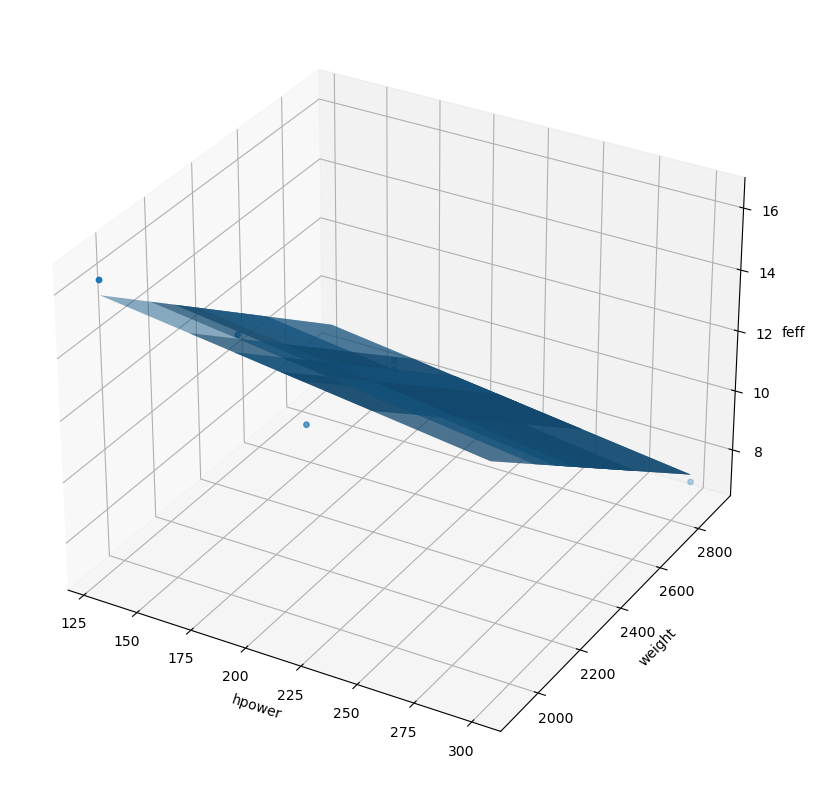

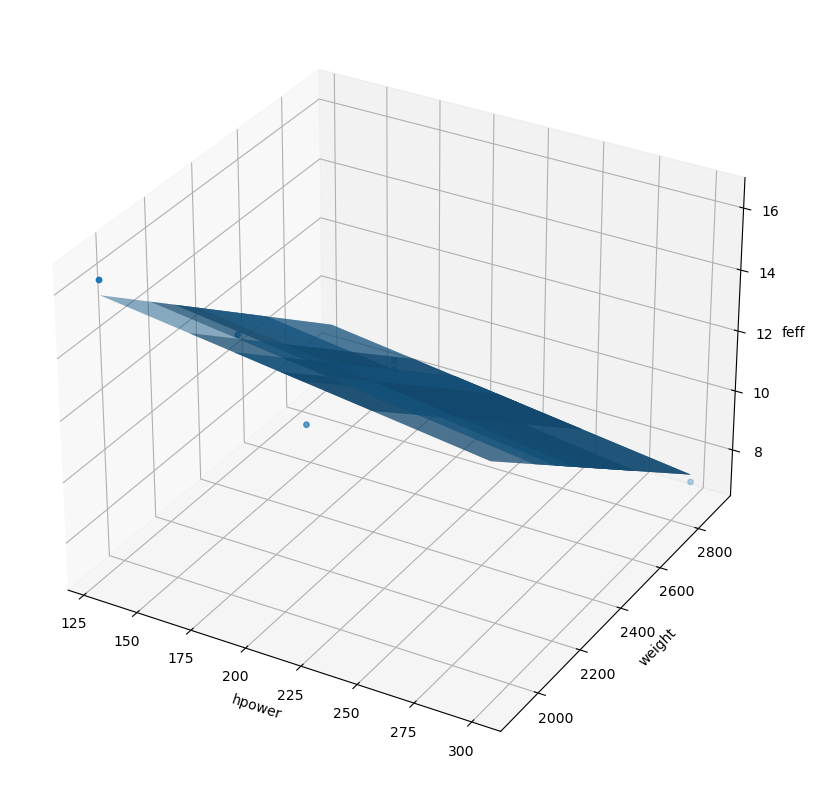

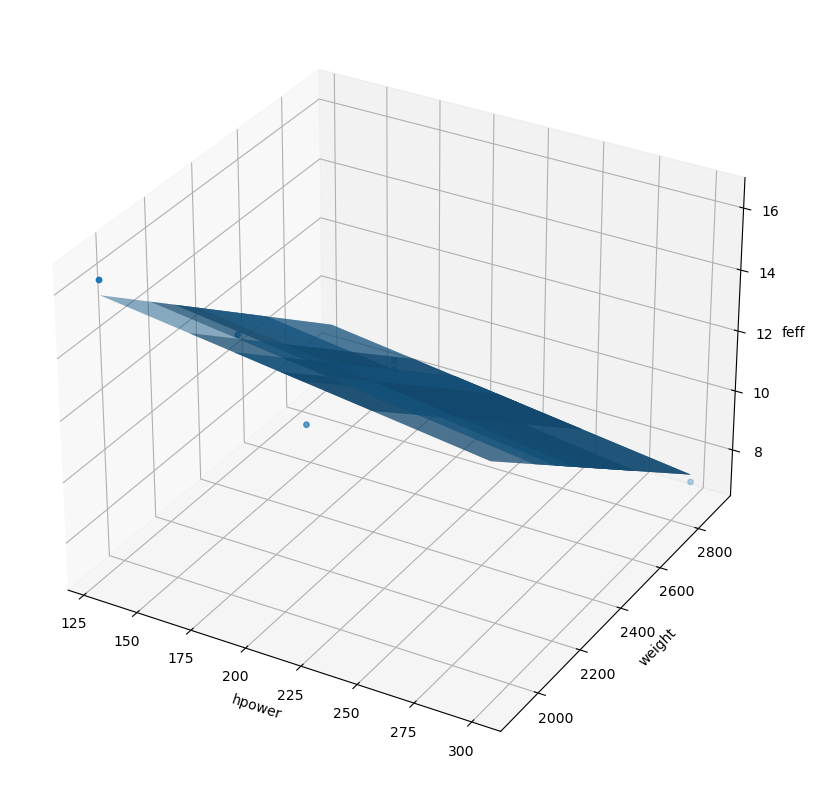

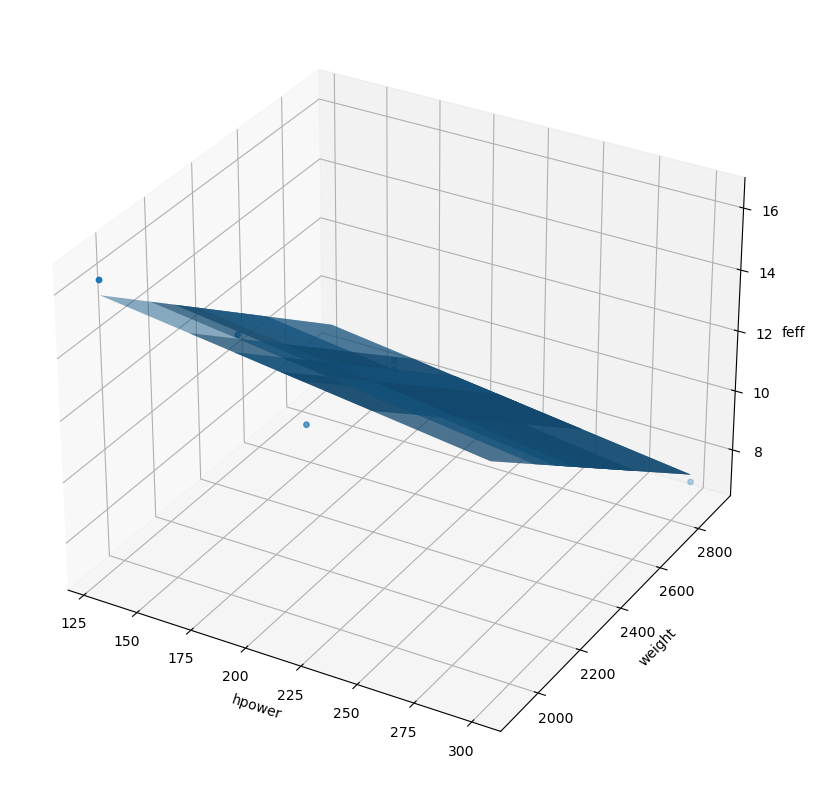

최종 결과 :  [-0.006894673126822117, -0.007310351438308803, 30.603561814272478]


In [6]:
# 4.2.1 다른풀이
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

df = pd.DataFrame({'name': ['A', 'B', 'C', 'D', 'E', 'F', 'G'], 
                   'hpower': [130, 250, 190, 300, 210, 220, 170], 
                   'weight': [1900, 2600, 2200, 2900, 2400, 2300, 2100],
                   'feff': [16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2]})

x1 = df['hpower'].to_numpy()
x2 = df['weight'].to_numpy()
y = df['feff'].to_numpy()

def f(X_01, X_02, theta):
    return theta[0]*X_01 + theta[1]*X_02 + theta[2]

learning_iteration = 200000
learning_rate_01 = 0.0000001
learning_rate_02 = 0.00000003
learning_rate_03 = 0.05

theta = [0, 0, 0]

for i in range(learning_iteration):
    y_predict = f(x1, x2, theta)
    error = y_predict - y
    theta[0] -= learning_rate_01 * (error*x1).sum()
    theta[1] -= learning_rate_02 * (error*x2).sum()
    theta[2] -= learning_rate_03 * error.sum()

    if i % 50000 == 0 :
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x1, x2, y, s=15, cmap='Greens')
        x1_mesh, x2_mesh = np.meshgrid(x1, x2)
        y_mesh = param[0] * x1_mesh + param[1] * x2_mesh + param[2]
        ax.plot_surface(x1_mesh, x2_mesh, y_mesh, alpha=0.5)
        ax.set_xlabel('hpower')
        ax.set_ylabel('weight')
        ax.set_zlabel('feff')
        plt.show()


print('최종 결과 : ', theta)